In [1]:
#%matplotlib notebook
import time, winsound, h5py, os
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline
from tqdm import tqdm

%load_ext autoreload
%autoreload 2
from Functions import *
from LCLS_Optics import *

In [44]:
N = 128       # number of sampling points
E0 = 9.9e3    # photon energy in eV
FOV = 2e-3   # [m]

tau = 20
window = 5000
tau_chirp = 1000

# group delay dispersion [fs^2]
GDD = np.sqrt( (np.square(tau_chirp*tau)-tau**4) / (16*np.square(np.log(2))) )

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 50e-6/(2*np.sqrt(2*np.log(2))),
    'sigma_y': 50e-6/(2*np.sqrt(2*np.log(2))),
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 0
}

print(GDD)

7212.032365105563


In [45]:
def define_bl(E0=9000, FOV=1e-3, N=1024):
    im0 = optics.PPM('im0', z = 400., FOV=FOV, N=N)
    devices = [im0]
    return devices

In [46]:
devices = define_bl(E0=E0, FOV=FOV, N=N)
bl = beamline.Beamline(devices, ordered=True)

print('\nOE positions')
for device in devices:
    print(device.name, device.z)


OE positions
im0 400.0


In [47]:
%%capture capt
tstart = time.time()
# propagate
beam_params['photonEnergy'] = E0
pulse = beam.Pulse(beam_params=beam_params, tau=tau, time_window=window)
pulse_chirp = beam.Pulse(beam_params=beam_params, tau=tau, time_window=window, GDD=GDD)
pulse.propagate(beamline=bl, screen_names=['im0'])
pulse_chirp.propagate(beamline=bl, screen_names=['im0'])
tfin = time.time()

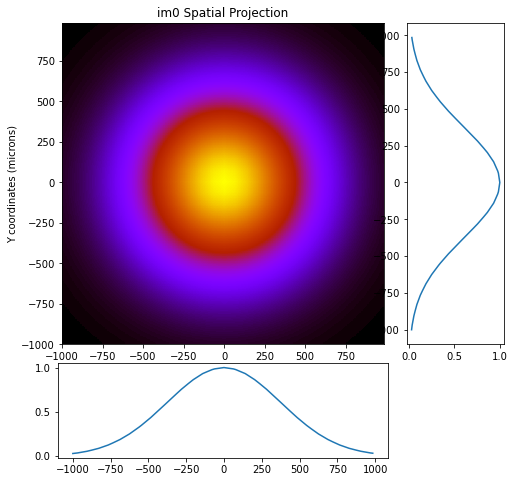

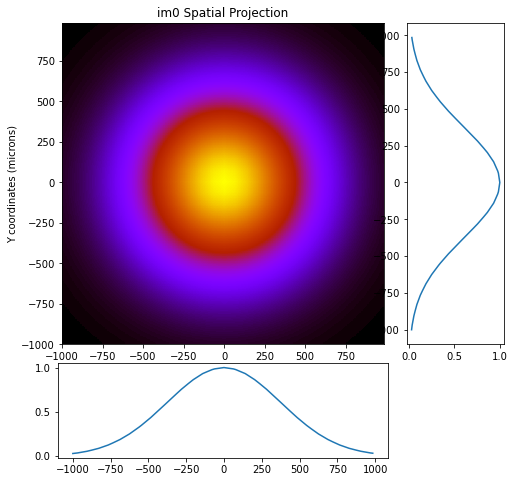

In [48]:
''' beam profiles '''
im_names = ['im0']

for i in range(len(im_names)):
    im_name = im_names[i]
    
    # spatial projection (xy)
    pulse.imshow_projection(im_name)
    pulse_chirp.imshow_projection(im_name)
    # time and energy component slice (x/y vs t/E)
    #for dim in ['x','y']:
     #   pulse.imshow_time_slice(im_name, dim=dim)
      #  pulse.imshow_energy_slice(im_name, dim=dim)


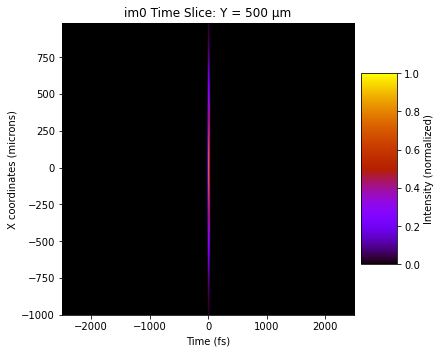

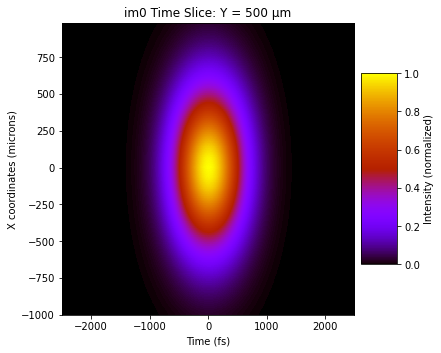

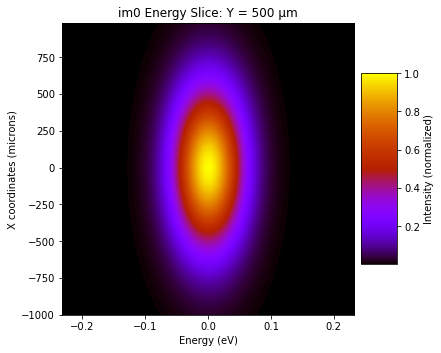

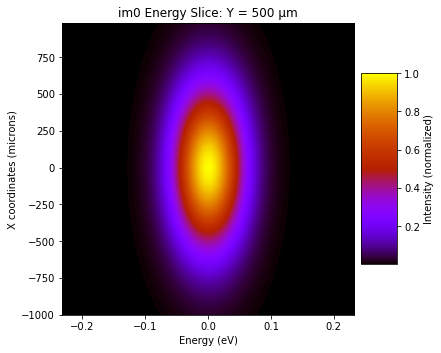

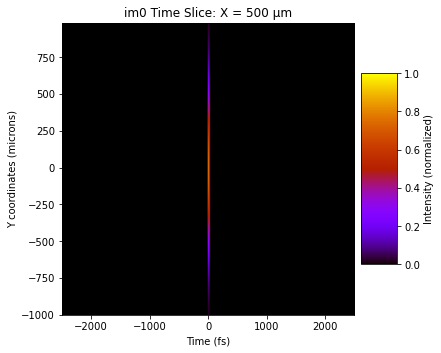

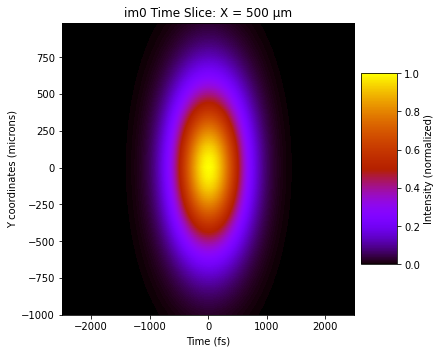

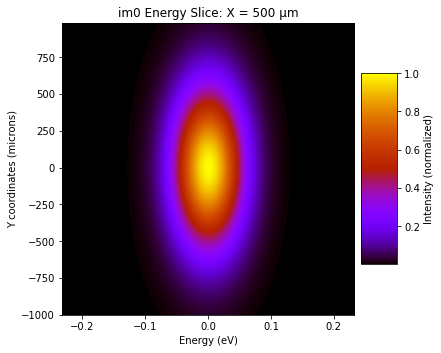

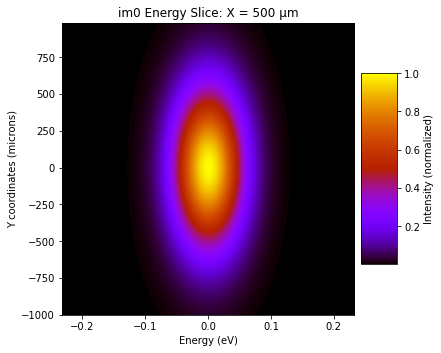

In [49]:
''' beam profiles '''
im_names = ['im0']

slice_pos = 500
for i in range(len(im_names)):
    im_name = im_names[i]

    # time and energy component slice (x/y vs t/E)
    for dim in ['x','y']:
        pulse.imshow_time_slice(im_name, dim=dim, slice_pos = slice_pos)
        pulse_chirp.imshow_time_slice(im_name, dim=dim, slice_pos = slice_pos)
        pulse.imshow_energy_slice(im_name, dim=dim, slice_pos = slice_pos)
        pulse_chirp.imshow_energy_slice(im_name, dim=dim, slice_pos = slice_pos)
